Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer 1: Boosting is an ensemble learning technique that combines multiple weak learners (typically shallow decision trees) sequentially to form a strong predictive model.

Each new learner focuses on the errors (misclassified samples) made by previous ones, assigning higher weights to those difficult cases. Over iterations, the model reduces both bias and variance, improving overall accuracy and robustness.



Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer 2:

ADABOOST
- Adjusts sample weights — misclassified samples get higher weights in the next iteration.
- Focuses on misclassified points by reweighting.
- Weighted majority vote (classification) or weighted sum (regression).
- More sensitive due to weight amplification.

GRADIENT BOOSTING
- Fits new models to residual errors (differences between actual and predicted values).
- Minimizes a loss function (e.g., MSE, log loss) using gradient descent.
- Additive model where each learner corrects previous residuals.
- Less sensitive, as gradient updates are smoother.


Question 3: How does regularization help in XGBoost?

Answer 3: In XGBoost, regularization helps prevent overfitting by controlling model complexity through penalties on large coefficients or overly complex trees.



Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer 4: CatBoost is efficient for handling categorical data because it uses ordered encoding and target-based statistics instead of traditional one-hot encoding.

- It automatically converts categorical features into numerical values using target statistics while avoiding data leakage.
- Handles high-cardinality features effectively without exploding feature space.
- Reduces preprocessing effort and improves training speed and accuracy on datasets with many categorical variables.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer 5:
Boosting techniques are preferred over bagging in scenarios requiring high accuracy and complex pattern detection, especially when reducing bias is critical.

Common real-world applications include:

- Credit scoring & loan default prediction — capturing subtle risk patterns in financial data.
-  Medical diagnosis — improving precision in disease prediction.
- Customer churn & fraud detection — identifying rare or complex behavioral patterns.
- Click-through rate (CTR) prediction — used in ad targeting and recommendation systems.

Question 6: Write a Python program to:

- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

In [1]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train AdaBoost Classifier ---
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9649


Question 7: Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
# --- Import Libraries ---
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# --- Load Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target

# --- Use a Subset for Faster Computation ---
np.random.seed(42)
subset_idx = np.random.choice(len(X), 2000, replace=False)
X, y = X[subset_idx], y[subset_idx]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Gradient Boosting Regressor ---
gbr_model = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.7815


Question 8: Write a Python program to:

- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [3]:
# --- Import Libraries ---
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define XGBoost Classifier (updated, no warnings) ---
xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',   # handles classification automatically
    random_state=42,
    verbosity=0              # suppress XGBoost training logs
)

# --- Define Parameter Grid ---
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# --- Apply GridSearchCV ---
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# --- Evaluate Best Model ---
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# --- Print Results ---
print("Best Parameters:", grid_search.best_params_)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.9561


Question 9: Write a Python program to:

- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy: 0.9649


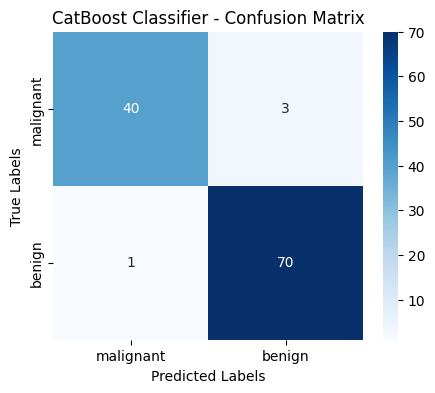

In [6]:
# --- Import Libraries ---
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train CatBoost Classifier ---
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    verbose=0,           # Suppress training output
    random_seed=42
)
cat_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("CatBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:

- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

Answer 10:

1. Data Preprocessing
- Handle Missing Values
- Handle Outliers
- Encode Categorical Features
- Scale Numeric Features

2. Model Choice
- AdaBoost	Small datasets, low noise
- XGBoost	Large, complex, mixed data
- CatBoost	Many categorical features

3. Hyperparameter Tuning Strategy
Use GridSearchCV or Optuna/Bayesian optimization to tune parameters like:
- learning_rate → controls step size (0.05–0.1 optimal).
- n_estimators → number of boosting rounds (100–500).
- max_depth → controls tree complexity.
- scale_pos_weight (XGBoost/CatBoost) → handles class imbalance.
- subsample, colsample_bytree → add randomness, prevent overfitting.

4. Evaluation Metrics
Since the dataset is imbalanced, accuracy is misleading.

5. Business Impact
- Risk reduction
- Profit maximization
- Operational efficiency
- Trustworthy decisions